In [1]:
import numpy as np
#from uncertainties import ufloat, unumpy
#from uncertainties.umath import *
from astropy.io import fits
from astropy.table import Table
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

#from astropy.stats import LombScargle
#from scipy.ndimage.filters import gaussian_filter
from scipy import signal
# from importlib import reload as reload
import warnings
warnings.filterwarnings("ignore")

import astropy.io.fits as pyfits

from stingray.pulse.search import epoch_folding_search, z_n_search


from stingray.pulse.pulsar import fold_events
from stingray.pulse.search import plot_profile

import matplotlib.pyplot as pl
import numpy as np
from stingray.pulse.search import search_best_peaks
from stingray.stats import fold_detection_level, z2_n_detection_level
from stingray.pulse.modeling import fit_gaussian

In [2]:
# plt.style.use('seaborn-notebook')
# %matplotlib notebook

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# import seaborn as sns

# sns.set(context='notebook',style='dark')
# plt.style.use(['dark_background'])

In [3]:
# medium singal
duration = 10000
amp = 0.5
base = amp + 0.2
N=1500
nbin=6
oversampling=1
epsilon = 0.5


# # weak singal
# duration = 9
# amp = 0.15
# base = amp + 1
# N=1000
# nbin=6
# oversampling=1
# epsilon = 0.8


# weak singal smaller pulsed amplitude
# duration = 10
# amp = 0.2
# base = amp + 1
# N=100
# nbin=6
# oversampling=1
# epsilon = 0.5

58162


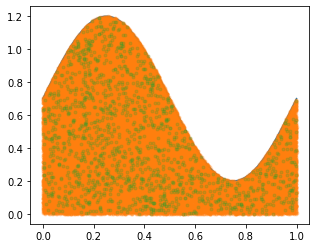

In [4]:


x = np.linspace(0, 1,100)

sx = np.random.uniform(0,1,100000)




def f(x):
    return amp*np.sin(x*(2*np.pi))+ base


y = f(sx)

sy = np.random.uniform(0,np.max(y),100000)

mask = sy <= y
print(len(sx[mask]))

plt.figure(figsize=(5, 4))
pl.plot(x, f(x), '-')

pl.plot(sx[mask], sy[mask], '.',alpha=0.2)

xx= sx[mask]
yy = sy[mask]
pl.plot(xx[0:N], yy[0:N], '.',alpha=0.2)

0.9999906882604818
10000.0
10000.397983027005


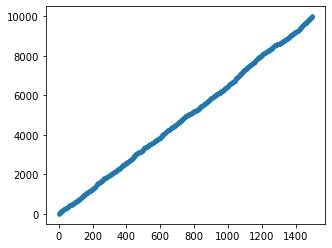

In [5]:
NN = len(sx[mask])


fix_phase = np.round(np.random.uniform(0,duration,NN))

sim_time = sx[mask] + fix_phase

sim0 =sim_time[0:N]

sim1 = np.sort(sim0)
print(np.max(sx[mask]))
print(np.max(fix_phase))
print(np.max(sim_time))

plt.figure(figsize=(5, 4))
pl.plot(sim1, '.')

23.75886370253272
[1.e-04 1.e+00 3.e-04]


Text(0, 0.5, '$Z_2$ Statistics')

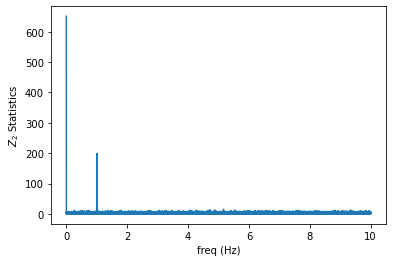

In [6]:


obs_length = duration
df_min = 1/obs_length

Fmin = 1/obs_length
Fmax = 10.0


df = df_min / oversampling
frequencies = np.arange(Fmin,Fmax, df)


nharm = 1
freq, zstat = z_n_search(sim1, frequencies, nbin=nbin, nharm=nharm)

from stingray.stats import fold_detection_level, z2_n_detection_level

ntrial = (frequencies[-1] - frequencies[0]) / df_min
z_detlev = z2_n_detection_level(n=1, epsilon=epsilon, ntrial=len(freq))
cand_freqs_z, cand_stat_z = search_best_peaks(freq, zstat, z_detlev)


print(z_detlev)
print(cand_freqs_z)

plt.figure()
#plt.xscale("log")
plt.plot(freq, zstat, label='$Z_2$ Statistics')
plt.xlabel('freq (Hz)')
plt.ylabel('$Z_2$ Statistics')
# _ = plt.legend()

In [7]:
fg=fit_gaussian(freq, zstat,amplitude=max(zstat), 
                mean=cand_freqs_z[0], stddev=1/(np.pi*obs_length))


print(z_detlev)
print(cand_freqs_z)
print(fg.mean)

23.75886370253272
[1.e-04 1.e+00 3.e-04]
Parameter('mean', value=9.790805312077675e-05)


10213.664434389548


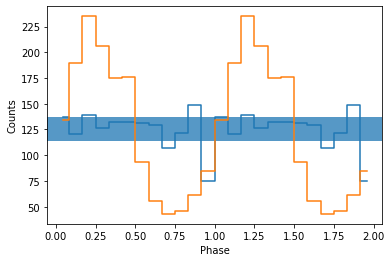

In [9]:
plt.close('all')
nbin = 12

period_f = 1/fg.mean.value

print(period_f)


ph, profile, profile_err = fold_events(sim1, 1/period_f, nbin=nbin)
_ = plot_profile(ph, profile)

ph, profile, profile_err = fold_events(sim1, 1, nbin=nbin)
_ = plot_profile(ph, profile)